# Group 33 - Proposal #

# Introduction

## start with background information
Q: Based on their medical profile, what is the diabetes status of a patient?

info on dataset used to answer this question

# Preliminary exploratory data analysis


## Reading and Wrangling

In [94]:
library(tidyverse)
library(tidymodels)
require(gridExtra)

In [95]:
url <- "https://raw.githubusercontent.com/billiehbl/project_group33/main/diabetes_prediction_dataset.csv"
diabetes_data <- read_csv(url, show_col_types = FALSE)

tidy_diabetes <- diabetes_data |> filter(smoking_history != "No Info") |> filter(gender != 'Other')|>
    filter(age >= 2)|> mutate(diabetes = as_factor(diabetes))

## Splitting into training and testing

In [96]:
diabetes_split <- initial_split(tidy_diabetes, prop = 0.75, strata = diabetes)
diabetes_train <- training(diabetes_split)
diabetes_train = diabetes_train[sample(1:nrow(diabetes_train)), ] # shuffles data frame
diabetes_testing <- testing(diabetes_split)
head(diabetes_train)

gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
Male,50,1,0,never,37.26,5.7,160,0
Female,47,0,0,never,30.55,6.2,145,0
Male,72,0,0,never,25.52,6.6,130,0
Male,56,0,0,current,32.83,6.0,100,0
Female,24,0,0,never,23.28,4.5,130,0
Male,55,0,0,ever,22.51,6.5,126,0


## Summarize

In [97]:
# fivenum(diabetes_train$bmi)

## Visualize

`summarise()` has grouped output by 'diabetes'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'diabetes'. You can override using the
`.groups` argument.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



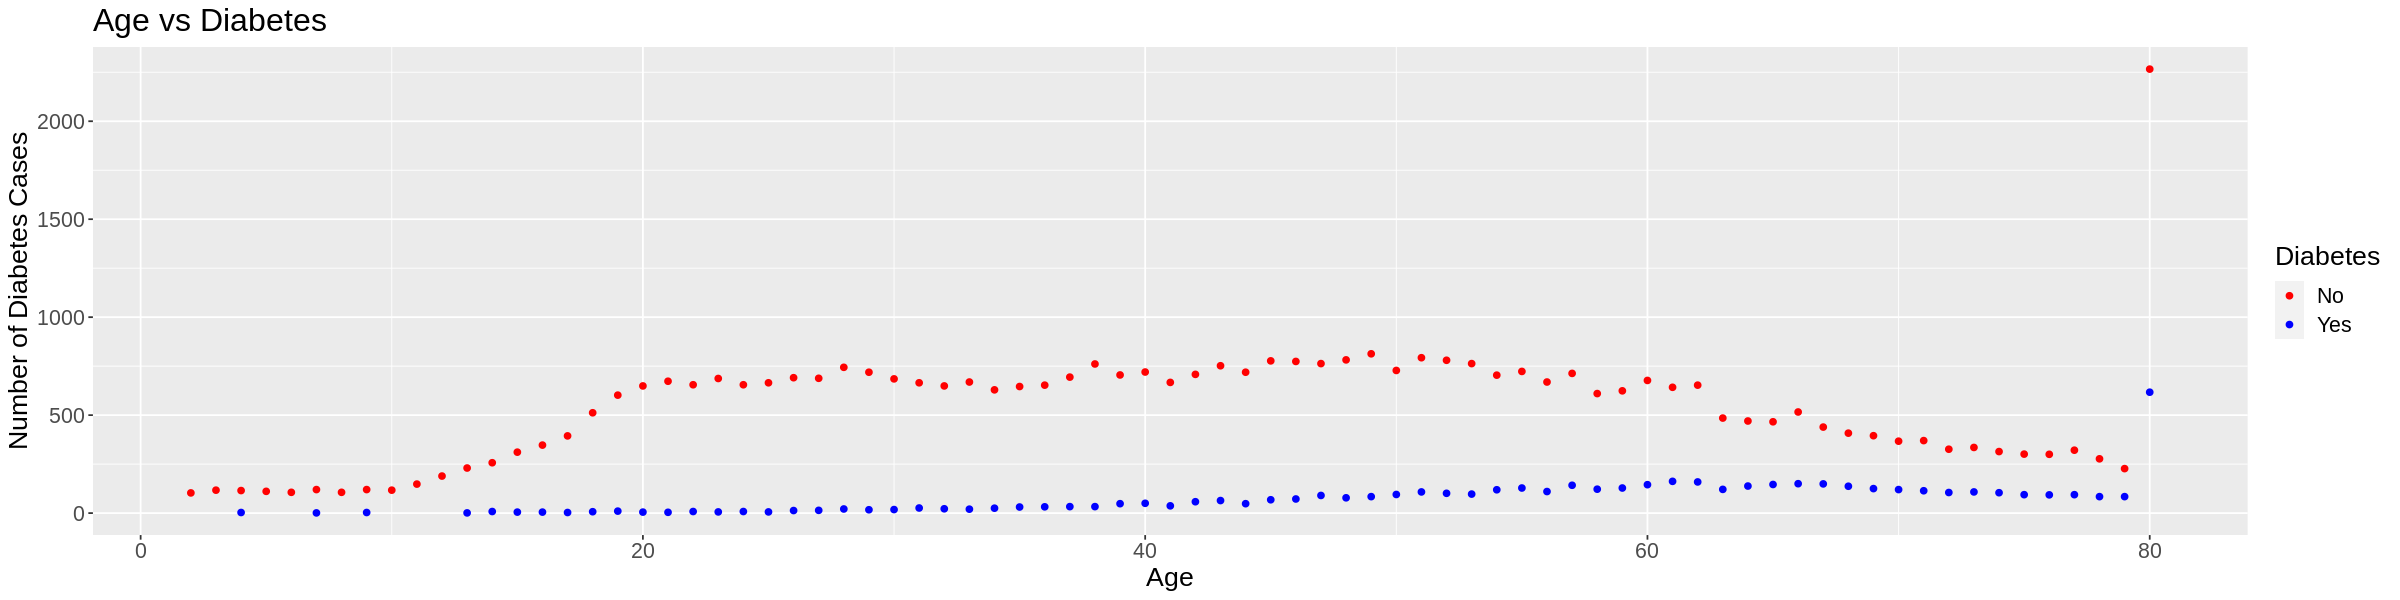

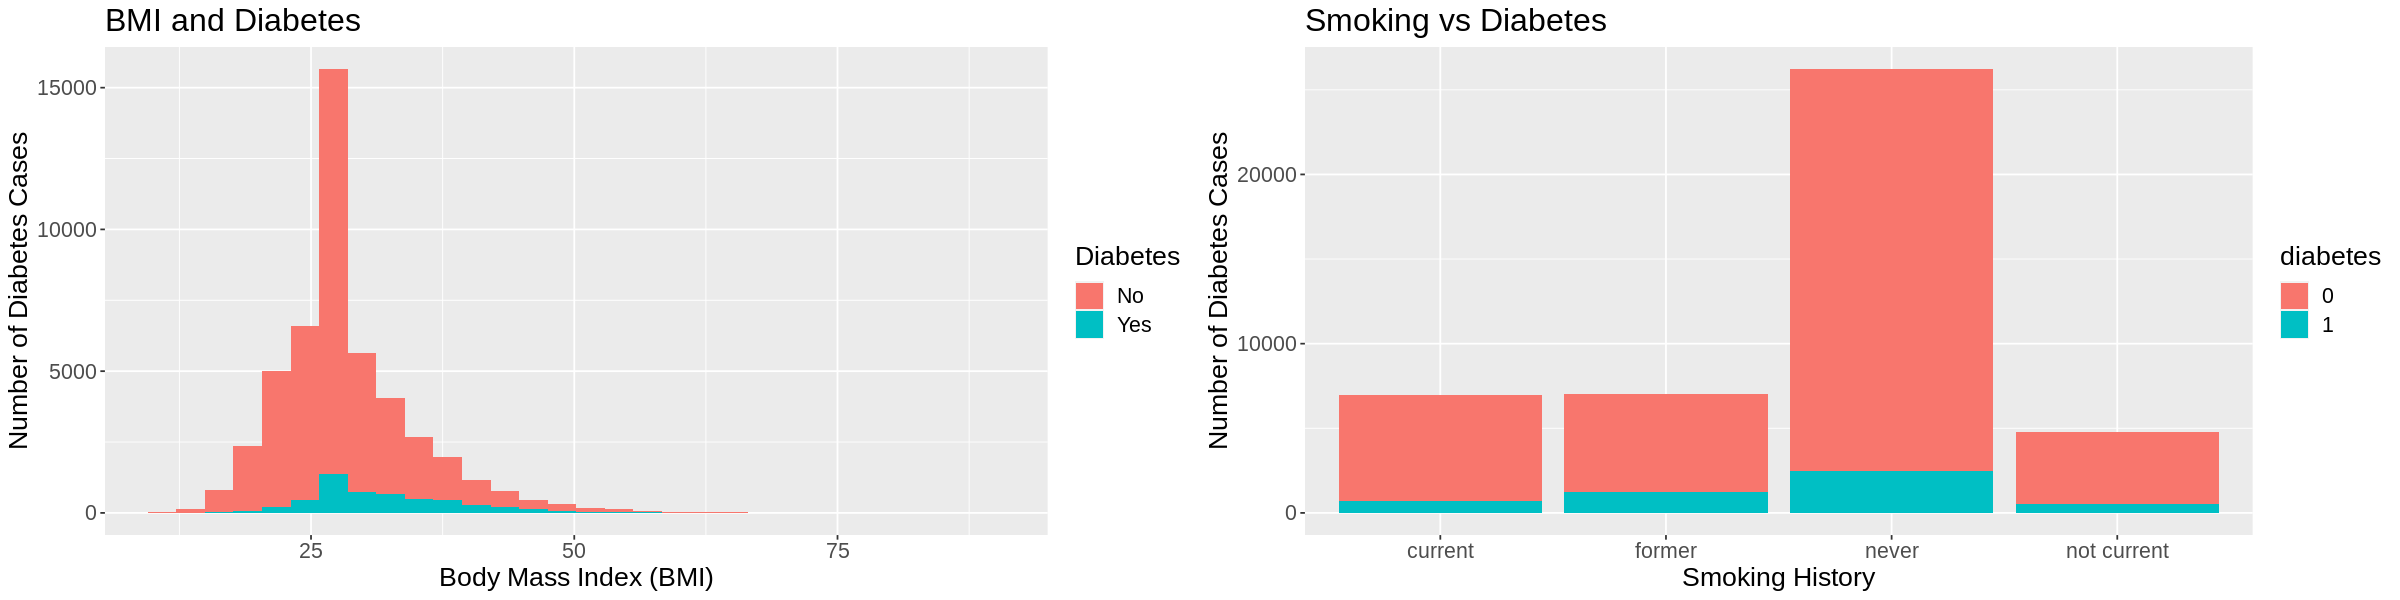

In [98]:
options(repr.plot.width = 20, repr.plot.height = 5)

age_scatter = ggplot(diabetes_train |> group_by(diabetes, age)|> summarize(num_age = n()), 
                     aes(x=age, y=num_age, color=diabetes)) + geom_point() + 
    labs(x='Age', y='Number of Diabetes Cases', title="Age vs Diabetes", color='Diabetes') + 
    scale_color_manual(labels = c("No", "Yes"), values = c("red", "blue")) +
    theme(text=element_text(size=16))

bmi_hist = ggplot(diabetes_train, aes(x = bmi, fill = diabetes)) + geom_histogram() + 
    labs(x='Body Mass Index (BMI)', y='Number of Diabetes Cases', title="BMI and Diabetes") +
    scale_fill_discrete(name = "Diabetes", labels = c("No", "Yes")) +
    theme(text=element_text(size=16))

smoking_scatter = ggplot(diabetes_train |> group_by(diabetes, smoking_history)|> 
                         summarize(num_age = n()) |> filter(smoking_history != 'ever'), 
                     aes(x=smoking_history, y=num_age, fill=diabetes)) + geom_bar(stat = "identity") + 
    labs(x='Smoking History', y='Number of Diabetes Cases', title="Smoking vs Diabetes", color='Diabetes') + 
    scale_color_manual(labels = c("No", "Yes"), values = c("red", "blue")) +

    theme(text=element_text(size=16))

age_scatter
grid.arrange(bmi_hist, smoking_scatter, ncol=2)


# Methods

# Expected Outcomes and Significance

**What do you expect to find?**

We expect to find that those who score highest in the all of the variables (gender, age, hypertension, 
heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level) will be more likely to be diagnosed 
with diabetes compared to those who scored lower in these categories.


**What impact could such findings have?**

By analyzing these variables as a collective group, researchers can develop predictive models, risk 
assessment tools, and interventions to identify the individuals who are at high risk for diabetes. 
Moreover, these findings can help healthcare professionals initiate prevention strategies, provide early 
interventions, and even improve diabetes management in affected individuals.


**What future questions could this lead to?**

Future questions this data can lead to is how do these variables interact with other factors such as 
genetic predispositions, socioeconomic status, or lifestyle factors, to impact the susceptibility of being
diagnosed with diabetes.

Furthermore, this can lead to other future questions such as if we combine these variables with certain 
biomarkers or genetic markers it can enhance the early dectect of diabetes.
Lastly, we have only shown how BMI and age interacts with diabetes in the graphs above; however, it would 
also be reasonable to have future questions regarding the relationship between all the different variables
in the dataset and diabetes. For example, how does blood glucose levels correlate with diabetes diagnosis 
and risk assessment? How does smoking history influence the risk and progression of diabetes?